In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

/tmp/ipykernel_728555/3884926229.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("../Data/performance_data.csv")
data.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


In [3]:
data.loc[0]["preview_link"]

'https://s3.us-east-1.amazonaws.com/a.futureadlabs.com-us-east-1-backup/us-east-1/games/bfbf7a2b7ac635e67877b1ab87fd6629/b7a604b3b08f0862ef0e/index.html'

### Locating Assets in creative

In [5]:
jsoN = pd.read_json("../concepts.json")
jsoN.head()

,concept,implementation,explanation,asset_suggestions
0,Escape Challenge Teaser,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
1,Interactive Storytelling,{'frame_1': {'description': 'The ad opens with...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
2,City Tour,{'frame_1': {'description': 'The ad begins wit...,This concept aligns with LEGO CITY's brand ide...,[{'frame_1': {'Background Animation': 'A suspe...
3,Interactive Globe Journey,{'frame_1': {'description': 'The ad opens with...,This concept aligns with the brand's identity ...,[{'frame_1': {'3D Globe': 'A high-definition 3...
4,Cultural Carousel,{'frame_1': {'description': 'A carousel of cul...,This concept leverages the brand's diverse por...,[{'frame_1': {'Background Image': 'A high-reso...


In [6]:
type(jsoN)

pandas.core.frame.DataFrame

In [7]:
jsoN["implementation"]

0      {'frame_1': {'description': 'The ad begins wit...
1      {'frame_1': {'description': 'The ad opens with...
2      {'frame_1': {'description': 'The ad begins wit...
3      {'frame_1': {'description': 'The ad opens with...
4      {'frame_1': {'description': 'A carousel of cul...
                             ...                        
110    {'frame_1': {'description': 'The first frame p...
111    {'frame_1': {'description': 'The first frame p...
112    {'frame_1': {'description': 'The first frame p...
113    {'frame_1': {'description': 'The ad begins wit...
114    {'frame_1': {'description': 'The ad starts wit...
Name: implementation, Length: 115, dtype: object

In [8]:
#!pip install opencv-python

In [9]:
from typing import Tuple
import cv2

In [10]:
def locate_image_on_image(locate_image: str, on_image: str, prefix: str = '', visualize: bool = False, color: Tuple[int, int, int] = (0, 0, 255)):
    try:

        image = cv2.imread(on_image)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        template = cv2.imread(locate_image, 0)

        result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
        _, _, _, max_loc = cv2.minMaxLoc(result)

        height, width = template.shape[:2]

        top_left = max_loc
        bottom_right = (top_left[0] + width, top_left[1] + height)

        if visualize:
            cv2.rectangle(image, top_left, bottom_right, color, 1)
            plt.figure(figsize=(10, 10))
            plt.axis('off')
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        return {f'{prefix}top_left_pos': top_left, f'{prefix}bottom_right_pos': bottom_right}

    except cv2.error as err:
        print(err)

{'eng_top_left_pos': (50, 114), 'eng_bottom_right_pos': (430, 177)}

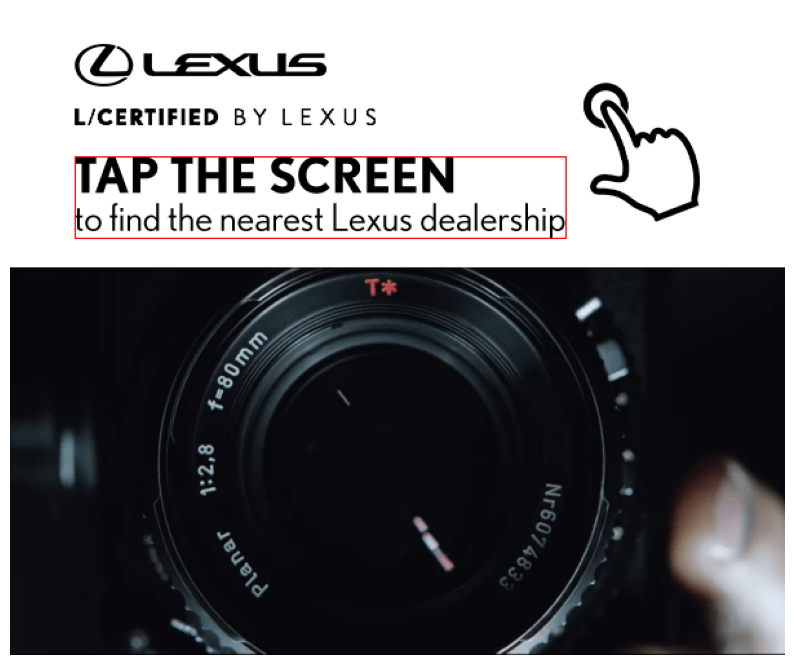

In [16]:
locate_image_on_image(
    '../Data/Assets/0a22f881b77f00220f2034c21a18b854/engagement_instruction_1.png', 
    '../Data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png',
    prefix='eng_', visualize=True
)

{'eng_top_left_pos': (427, 315), 'eng_bottom_right_pos': (600, 407)}

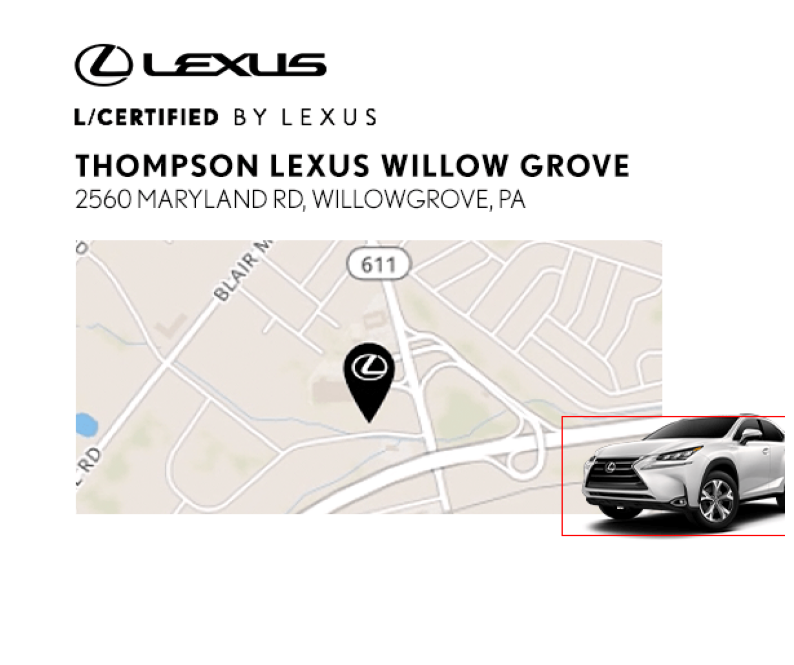

In [17]:
locate_image_on_image(
    '../Data/Assets/0a22f881b77f00220f2034c21a18b854/game_endfrmae.png', 
    '../Data/Assets/0a22f881b77f00220f2034c21a18b854/end-willowgrove.png',
    prefix='eng_', visualize=True
)

In [21]:
import torch
import yolov5

python: can't open file '/home/crs/10Academy/w10/Semantic_Image_Text_Alignment/notebooks/detect.py': [Errno 2] No such file or directory
